In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, 
                            recall_score, f1_score,
                            ConfusionMatrixDisplay)
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import pickle

In [3]:
# Data Loading
df_total_ksi = pd.read_csv('TOTAL_KSI.csv')

In [4]:
print(df_total_ksi.info())  # Column types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           18957 non-null  int64  
 1   INDEX              18957 non-null  int64  
 2   ACCNUM             14027 non-null  float64
 3   DATE               18957 non-null  object 
 4   TIME               18957 non-null  int64  
 5   STREET1            18957 non-null  object 
 6   STREET2            17251 non-null  object 
 7   OFFSET             3820 non-null   object 
 8   ROAD_CLASS         18471 non-null  object 
 9   DISTRICT           18728 non-null  object 
 10  LATITUDE           18957 non-null  float64
 11  LONGITUDE          18957 non-null  float64
 12  ACCLOC             13501 non-null  object 
 13  TRAFFCTL           18882 non-null  object 
 14  VISIBILITY         18933 non-null  object 
 15  LIGHT              18953 non-null  object 
 16  RDSFCOND           189

In [5]:
print(df_total_ksi.describe(include='all'))  # Summary stats for all columns

            OBJECTID         INDEX        ACCNUM                  DATE  \
count   18957.000000  1.895700e+04  1.402700e+04                 18957   
unique           NaN           NaN           NaN                  4128   
top              NaN           NaN           NaN  8/17/2014 8:00:00 AM   
freq             NaN           NaN           NaN                    35   
mean     9479.000000  3.994181e+07  5.576714e+08                   NaN   
std      5472.558862  3.749731e+07  1.180026e+09                   NaN   
min         1.000000  3.363207e+06  2.530100e+04                   NaN   
25%      4740.000000  5.408154e+06  1.034561e+06                   NaN   
50%      9479.000000  7.820656e+06  1.220029e+06                   NaN   
75%     14218.000000  8.092292e+07  1.386958e+06                   NaN   
max     18957.000000  8.180752e+07  4.008024e+09                   NaN   

                TIME   STREET1      STREET2        OFFSET      ROAD_CLASS  \
count   18957.000000     18957    

In [6]:
missing_data = df_total_ksi.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_data/len(df_total_ksi)) * 100
pd.concat([missing_data, missing_percent], axis=1, keys=['Total Missing', 'Percent Missing'])

,Total Missing,Percent Missing
EMERG_VEH,18908,99.741520
DISABILITY,18464,97.399378
CYCCOND,18157,95.779923
CYCACT,18155,95.769373
CYCLISTYPE,18152,95.753548
ALCOHOL,18149,95.737722
FATAL_NO,18087,95.410666
TRSN_CITY_VEH,17809,93.944189
TRUCK,17788,93.833412
REDLIGHT,17380,91.681173


In [7]:
# Feature Selection
relevant_features = [
    'DATE', 'TIME', 'LATITUDE', 
    'LONGITUDE', 'x', 'y',
    'OFFSET', 'ROAD_CLASS', 'ACCLOC',
    'TRAFFCTL', 'VISIBILITY', 'LIGHT',
    'RDSFCOND', 'IMPACTYPE', 'INVTYPE',
    'INVAGE', 'INJURY', 'INITDIR',  
    'VEHTYPE', 'MANOEUVER', 'DRIVACT', 
    'DRIVCOND', 'PEDTYPE', 'PEDACT', 
    'PEDCOND', 'CYCLISTYPE', 'CYCACT', 
    'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 
    'AUTOMOBILE', 'TRUCK', 'MOTORCYCLE', 
    'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 
    'SPEEDING', 'AG_DRIV', 'REDLIGHT', 
    'ALCOHOL', 'DISABILITY']

In [8]:
# Data Preprocessing
labels = df_total_ksi['ACCLASS']
print(labels.info())
df_features = df_total_ksi[relevant_features]
print(df_features.info())

<class 'pandas.core.series.Series'>
RangeIndex: 18957 entries, 0 to 18956
Series name: ACCLASS
Non-Null Count  Dtype 
--------------  ----- 
18956 non-null  object
dtypes: object(1)
memory usage: 148.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18957 entries, 0 to 18956
Data columns (total 41 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           18957 non-null  object 
 1   TIME           18957 non-null  int64  
 2   LATITUDE       18957 non-null  float64
 3   LONGITUDE      18957 non-null  float64
 4   x              18957 non-null  float64
 5   y              18957 non-null  float64
 6   OFFSET         3820 non-null   object 
 7   ROAD_CLASS     18471 non-null  object 
 8   ACCLOC         13501 non-null  object 
 9   TRAFFCTL       18882 non-null  object 
 10  VISIBILITY     18933 non-null  object 
 11  LIGHT          18953 non-null  object 
 12  RDSFCOND       18928 non-null  object 
 13  IMPACTYPE      

In [9]:
numeric_features = []
categorical_features = []

for col in df_features.columns:
    if df_features[col].dtype == 'object':
        categorical_features.append(col)
    else:
        numeric_features.append(col)

print('Numeric Features:', numeric_features)
print('Categorical Features:', categorical_features)

Numeric Features: ['TIME', 'LATITUDE', 'LONGITUDE', 'x', 'y']
Categorical Features: ['DATE', 'OFFSET', 'ROAD_CLASS', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'TRUCK', 'MOTORCYCLE', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']


In [10]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
print(labels_encoded.shape)

(18957,)


In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

In [12]:
# Model Pipeline with Hyperparameter Tuning
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=48))
])

param_grid = {
    'classifier__max_depth': [3, 5, 7, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_features': ['sqrt', 'log2', None],
}

In [ ]:
# Data Splitting

unseen_features = df_features.iloc[-10:]
unseen_labels = labels_encoded[-10:]

print(unseen_features)

# Remove the last 10 items from df_features and labels_encoded
#df_features = df_features.drop(df_features.iloc[:-10])

X_train, X_test, y_train, y_test = train_test_split(df_features, labels_encoded, test_size=0.2, random_state=48)


KeyError: "['DATE', 'TIME', 'LATITUDE', 'LONGITUDE', 'x', 'y', 'OFFSET', 'ROAD_CLASS', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'TRUCK', 'MOTORCYCLE', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY'] not found in axis"

In [14]:
# Model Training with Cross-Validation
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

c:\Users\hansr\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [15]:
# Model Evaluation
y_pred = best_dt.predict(X_test)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Estimator: {grid_search.best_estimator_}")
print(f"Training Accuracy: {grid_search.best_score_:.3f}")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Testing Precision: {precision_score(y_test, y_pred, average="micro"):.3f}")
print(f"Testing Recall: {recall_score(y_test, y_pred, average="micro"):.3f}")
print(f"Testing F1 Score: {f1_score(y_test, y_pred, average="micro"):.3f}")

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__max_features': None, 'classifier__min_samples_split': 2}
Best Estimator: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['TIME', 'LATITUDE',
                                                   'LONGITUDE', 'x', 'y']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
      

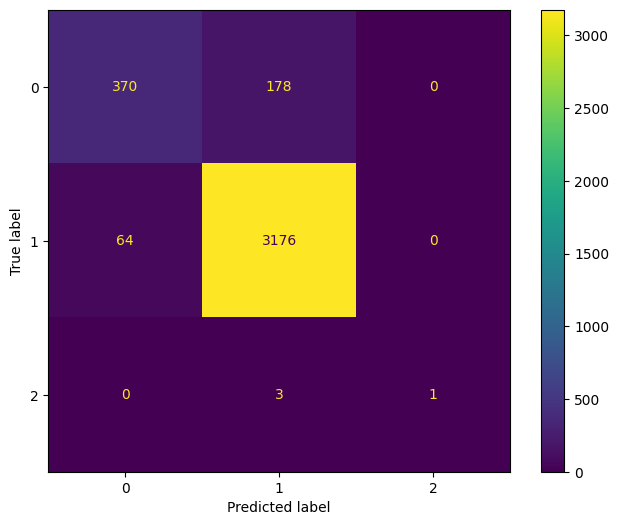

In [16]:
# Visualization
fig, ax = plt.subplots(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
plt.show()

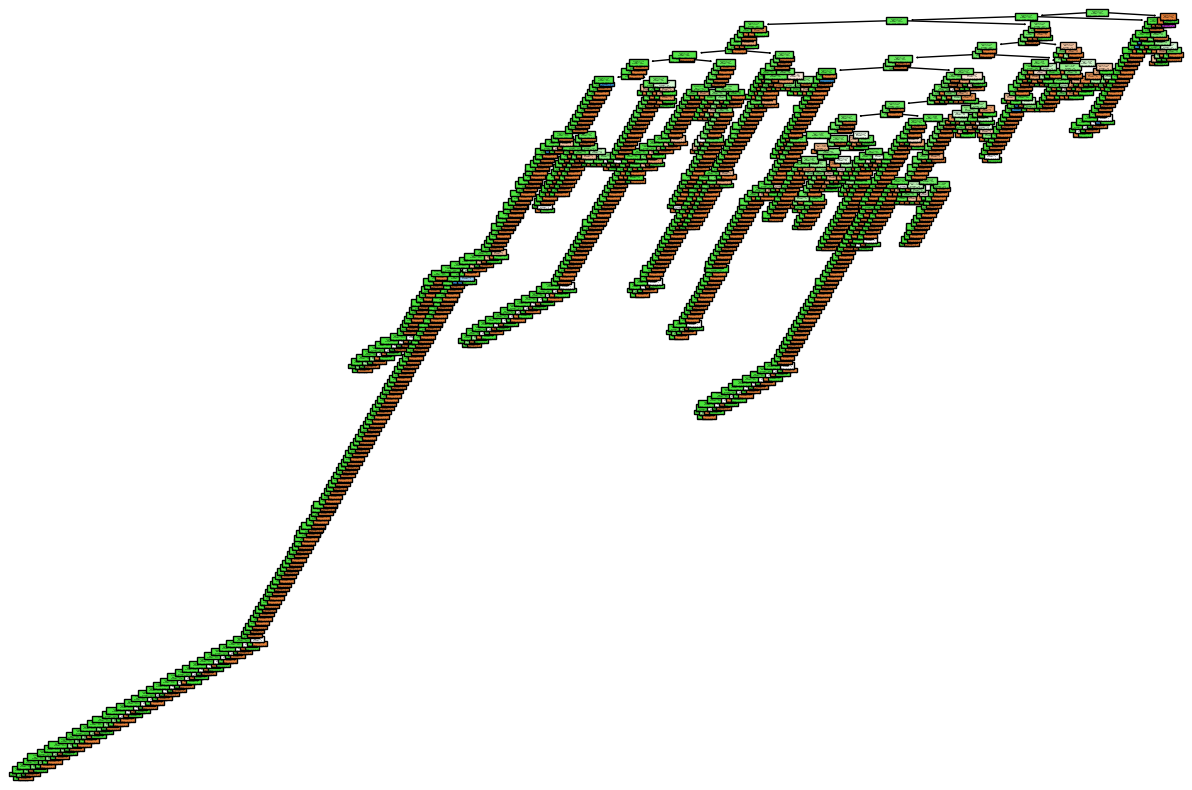

In [17]:
# Plot the tree
plt.figure(figsize=(15,10))
plot_tree(best_dt.named_steps['classifier'], filled=True)
plt.show()

In [18]:
# Unseen Data Prediction
unseen_predictions = best_dt.predict(unseen_features)
print(f"Unseen Data Accuracy: {accuracy_score(unseen_labels, unseen_predictions):.3f}")

Unseen Data Accuracy: 0.987


In [149]:
# Model Serialization
with open('dt_model.pkl', 'wb') as f:
    pickle.dump(best_dt, f)